### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [62]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [59]:
#Suma de los Precios
print('Precio Total de la Tienda 1')
print(tienda['Precio'].sum())

print('Precio Total de la Tienda 2')
print(tienda2['Precio'].sum())

print('Precio Total de la Tienda 3')
print(tienda3['Precio'].sum())

print('Precio Total de la Tienda 4')
print(tienda4['Precio'].sum())



Precio Total de la Tienda 1
1150880400.0
Precio Total de la Tienda 2
1116343500.0
Precio Total de la Tienda 3
1098019600.0
Precio Total de la Tienda 4
1038375700.0


--- Calculando Ingresos Totales por Tienda ---

Ingreso Total Tienda 1: 1150880400.00
Ingreso Total Tienda 2: 1116343500.00
Ingreso Total Tienda 3: 1098019600.00
Ingreso Total Tienda 4: 1038375700.00

--- Preparando Datos para Graficar ---

DataFrame de Ingresos Creado:
     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09

--- Generando Gráfico de Líneas de Ingreso Total por Tienda ---



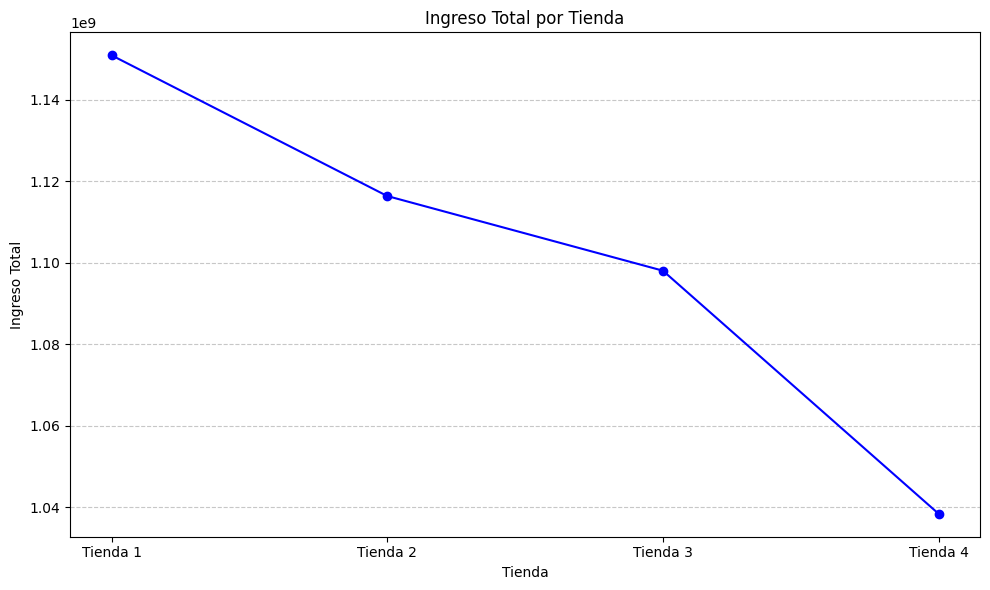

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

print('--- Calculando Ingresos Totales por Tienda ---\n')
# Calcular el ingreso total para cada tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print(f'Ingreso Total Tienda 1: {ingreso_tienda1:.2f}')
print(f'Ingreso Total Tienda 2: {ingreso_tienda2:.2f}')
print(f'Ingreso Total Tienda 3: {ingreso_tienda3:.2f}')
print(f'Ingreso Total Tienda 4: {ingreso_tienda4:.2f}')

print('\n--- Preparando Datos para Graficar ---\n')
# Crear un DataFrame para facilitar la graficación
datos_ingresos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
}

df_ingresos = pd.DataFrame(datos_ingresos)

print('DataFrame de Ingresos Creado:')
print(df_ingresos)

print('\n--- Generando Gráfico de Líneas de Ingreso Total por Tienda ---\n')
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_ingresos['Tienda'], df_ingresos['Ingreso Total'], marker='o', linestyle='-', color='blue')
plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [22]:
## cantidad de productos vendidos por cada categoria y los 3 mas vendidos
print ("Tienda 1, Top 3")
print(tienda['Categoría del Producto'].value_counts().head(3))

print ("Tienda 2, Top 3")
print(tienda2['Categoría del Producto'].value_counts().head(3))

print ("Tienda 3, Top 3")
print(tienda3['Categoría del Producto'].value_counts().head(3))

print ("Tienda 4, Top 3")
print(tienda4['Categoría del Producto'].value_counts().head(3))

Tienda 1, Top 3
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: count, dtype: int64
Tienda 2, Top 3
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64
Tienda 3, Top 3
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64
Tienda 4, Top 3
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64


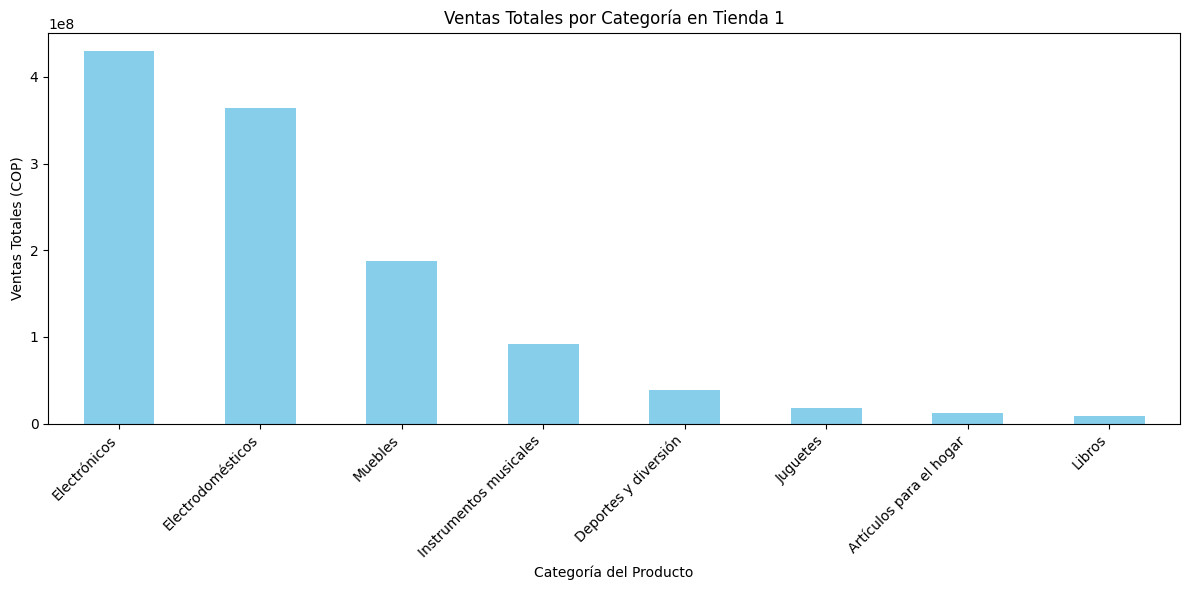

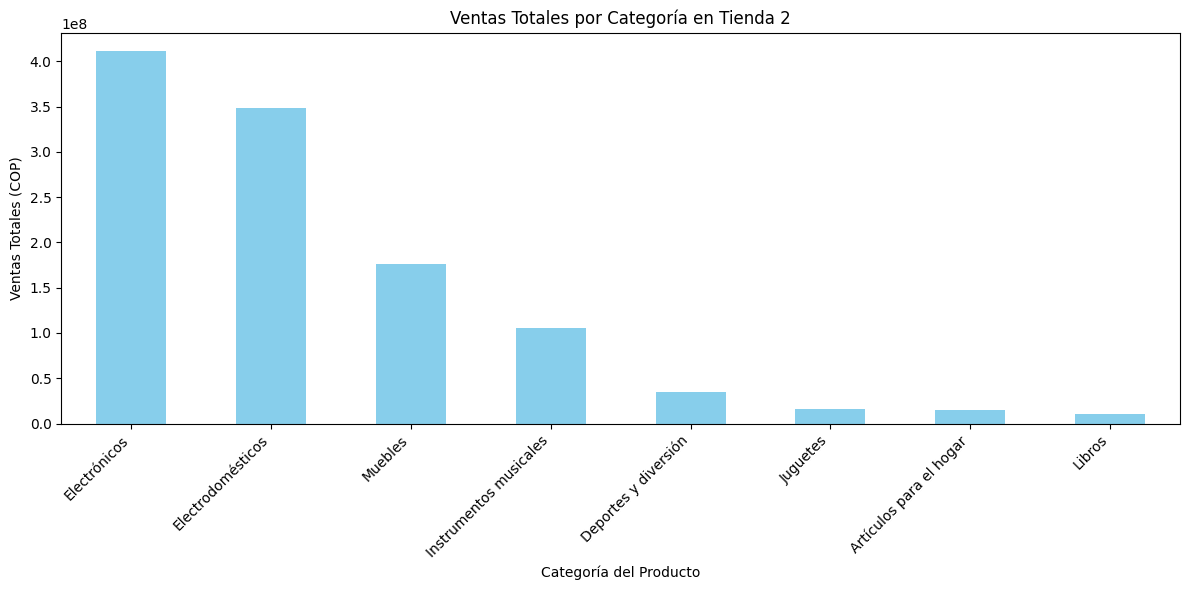

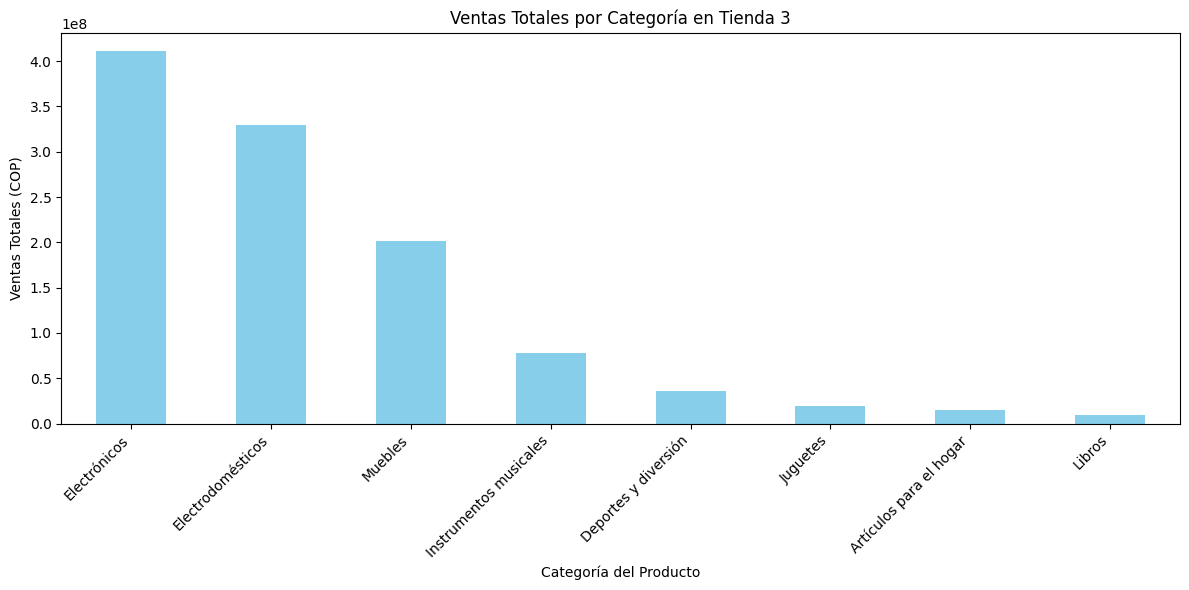

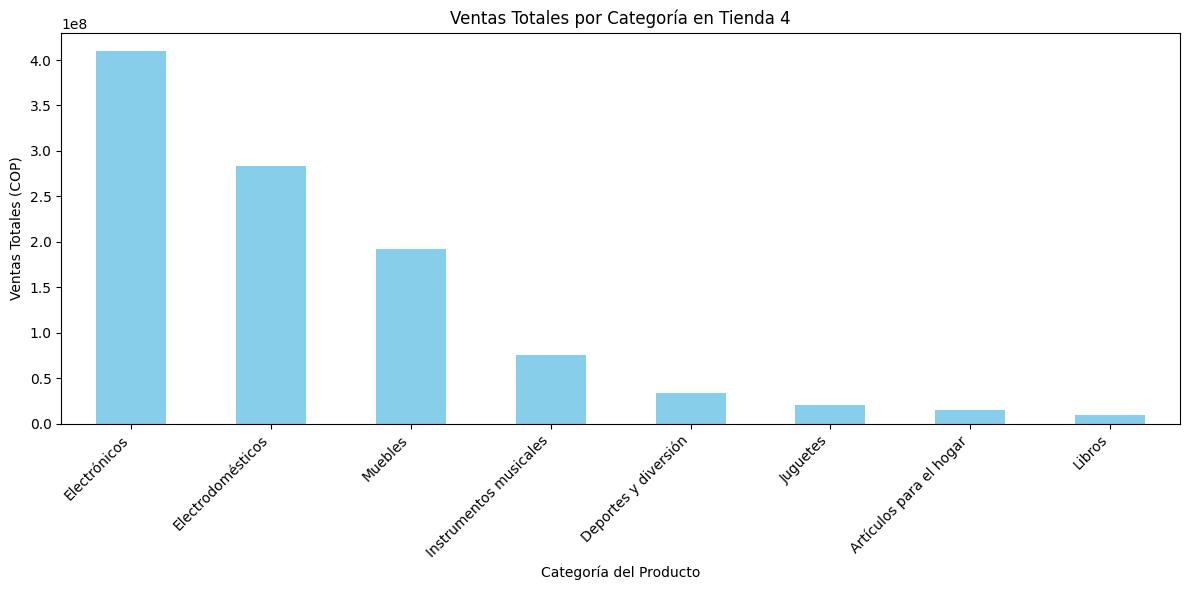

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

def graficar_ventas_por_categoria(dataframe, nombre_tienda):
    ventas_por_categoria = dataframe.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    ventas_por_categoria.plot(kind='bar', color='skyblue')
    plt.title(f'Ventas Totales por Categoría en {nombre_tienda}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Ventas Totales (COP)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Llamar a la función para cada tienda
graficar_ventas_por_categoria(tienda, 'Tienda 1')
graficar_ventas_por_categoria(tienda2, 'Tienda 2')
graficar_ventas_por_categoria(tienda3, 'Tienda 3')
graficar_ventas_por_categoria(tienda4, 'Tienda 4')

# 3. Calificación promedio de la tienda


In [30]:
##En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda.
##El objetivo es conocer la satisfacción del cliente con los productos vendidos.

print ('Promedio de la tienda 1')
print(tienda['Calificación'].mean().round(2))

print ('Promedio de la tienda 2')
print(tienda2['Calificación'].mean().round(2))

print ('Promedio de la tienda 3')
print(tienda3['Calificación'].mean().round(2))

print ('Promedio de la tienda 4')
print(tienda4['Calificación'].mean().round(2))




Promedio de la tienda 1
3.98
Promedio de la tienda 2
4.04
Promedio de la tienda 3
4.05
Promedio de la tienda 4
4.0


# 4. Productos más y menos vendidos

In [44]:
## En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda.
## Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

print('Producto más Vendido de la Tienda 1:')
print(tienda['Producto'].value_counts().head(1))
print('\nProducto Menos Vendido de la Tienda 1:')
print(tienda['Producto'].value_counts().tail(1))
print('----------------------')

print('Producto más Vendido de la Tienda 2:')
print(tienda2['Producto'].value_counts().head(1))
print('\nProducto Menos Vendido de la Tienda 2')
print(tienda2['Producto'].value_counts().tail(1))
print('----------------------')

print('Producto más Vendido de la Tienda 3:')
print(tienda3['Producto'].value_counts().head(1))
print('\nProducto Menos Vendido de la Tienda 3')
print(tienda3['Producto'].value_counts().tail(1))
print('----------------------')

print('Producto más Vendido de la Tienda 4:')
print(tienda4['Producto'].value_counts().head(1))
print('\nProducto Menos Vendido de la Tienda 4')
print(tienda4['Producto'].value_counts().tail(1))

Producto más Vendido de la Tienda 1:
Producto
Microondas    60
Name: count, dtype: int64

Producto Menos Vendido de la Tienda 1:
Producto
Celular ABXY    33
Name: count, dtype: int64
----------------------
Producto más Vendido de la Tienda 2:
Producto
Iniciando en programación    65
Name: count, dtype: int64

Producto Menos Vendido de la Tienda 2
Producto
Juego de mesa    32
Name: count, dtype: int64
----------------------
Producto más Vendido de la Tienda 3:
Producto
Kit de bancas    57
Name: count, dtype: int64

Producto Menos Vendido de la Tienda 3
Producto
Bloques de construcción    35
Name: count, dtype: int64
----------------------
Producto más Vendido de la Tienda 4:
Producto
Cama box    62
Name: count, dtype: int64

Producto Menos Vendido de la Tienda 4
Producto
Guitarra eléctrica    33
Name: count, dtype: int64


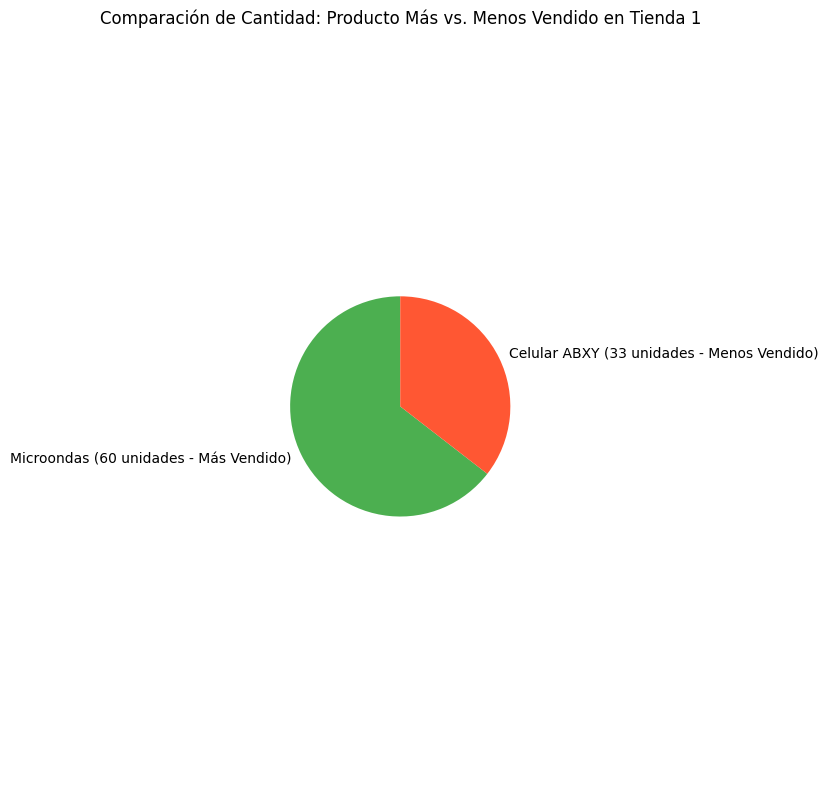

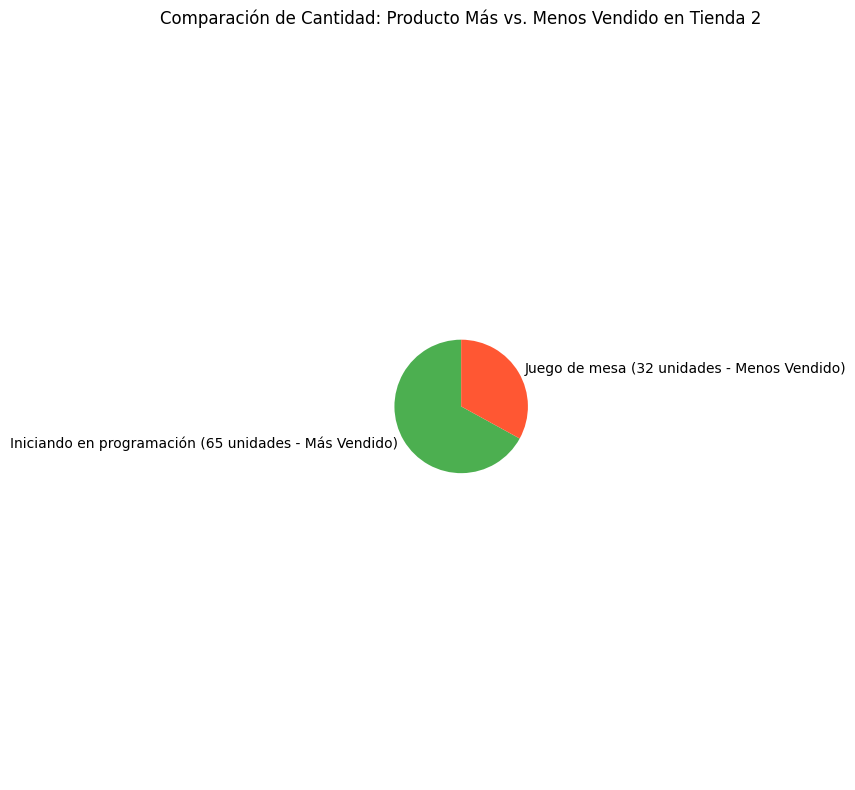

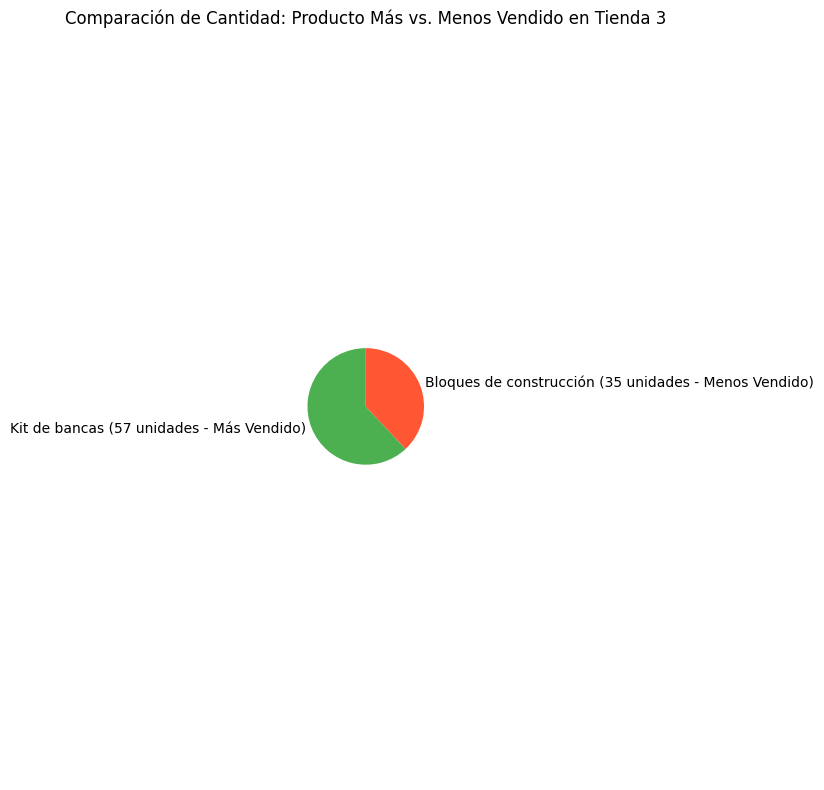

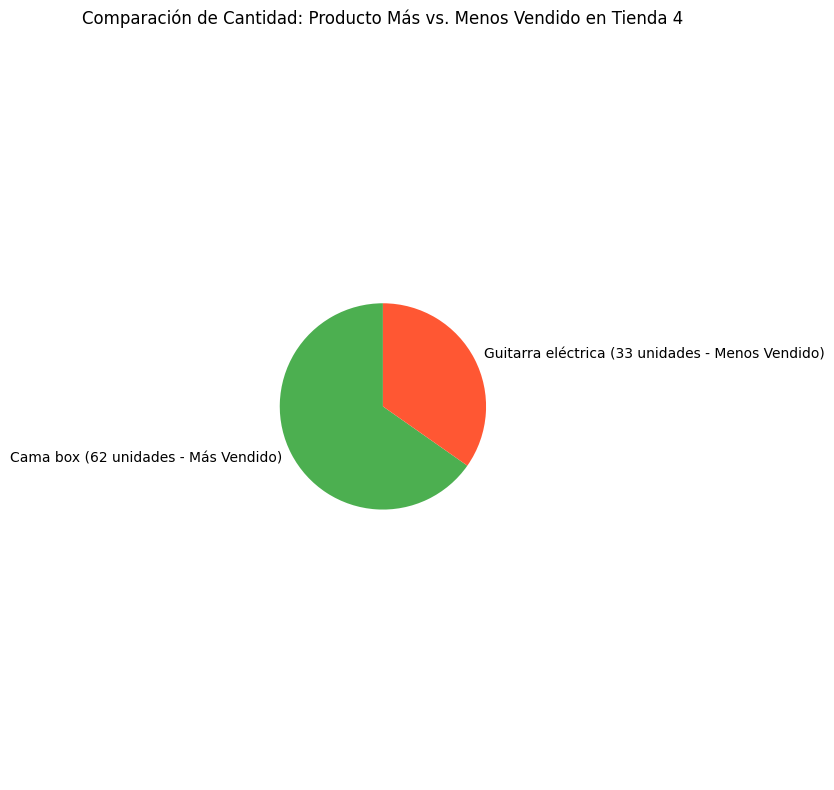

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

def graficar_pastel_productos_extremos(dataframe, nombre_tienda):
    conteo_productos = dataframe['Producto'].value_counts()

    if len(conteo_productos) < 2:
        print(f"No hay suficientes productos en {nombre_tienda} para comparar el más y menos vendido.")
        return

    producto_mas_vendido_nombre = conteo_productos.index[0]
    producto_mas_vendido_cantidad = conteo_productos.iloc[0]

    producto_menos_vendido_nombre = conteo_productos.index[-1]
    producto_menos_vendido_cantidad = conteo_productos.iloc[-1]

    # Datos para el gráfico de pastel
    etiquetas = [
        f'{producto_mas_vendido_nombre} ({producto_mas_vendido_cantidad} unidades - Más Vendido)',
        f'{producto_menos_vendido_nombre} ({producto_menos_vendido_cantidad} unidades - Menos Vendido)'
    ]
    cantidades = [producto_mas_vendido_cantidad, producto_menos_vendido_cantidad]
    colores = ['#4CAF50', '#FF5733'] # Verde para más vendido, rojo para menos vendido

    plt.figure(figsize=(8, 8))
    plt.pie(cantidades, labels=etiquetas, startangle=90, colors=colores) # Se quita autopct para no mostrar porcentajes
    plt.title(f'Comparación de Cantidad: Producto Más vs. Menos Vendido en {nombre_tienda}')
    plt.axis('equal') # Asegura que el pastel sea un círculo.
    plt.tight_layout()
    plt.show()

# Llamar a la función para cada tienda
graficar_pastel_productos_extremos(tienda, 'Tienda 1')
graficar_pastel_productos_extremos(tienda2, 'Tienda 2')
graficar_pastel_productos_extremos(tienda3, 'Tienda 3')
graficar_pastel_productos_extremos(tienda4, 'Tienda 4')

# 5. Envío promedio por tienda

In [53]:
##En este paso, debes calcular el costo de envío promedio para cada tienda.
##El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.##
##Sabiendo que el cliente paga el envío.

print('costo de envío promedio de la tienda 1')
print(tienda['Costo de envío'].mean().round(2))
print('---------------------------------------')

print('costo de envío promedio de la tienda 2')
print(tienda2['Costo de envío'].mean().round(2))
print('---------------------------------------')

print('costo de envío promedio de la tienda 3')
print(tienda3['Costo de envío'].mean().round(2))
print('---------------------------------------')

print('costo de envío promedio de la tienda 4')
print(tienda4['Costo de envío'].mean().round(2))
print('---------------------------------------')

costo de envío promedio de la tienda 1
26018.61
---------------------------------------
costo de envío promedio de la tienda 2
25216.24
---------------------------------------
costo de envío promedio de la tienda 3
24805.68
---------------------------------------
costo de envío promedio de la tienda 4
23459.46
---------------------------------------


#Informe Final

##Introduccion
El objetivo de este analisis es analizar, ventas, rendimientos y reseñas de 4 tiendas del señor Juan. Las tiendas son: Tienda 1, Tienda 2, Tienda 3 y Tienda 4.
A traves de la limpieza y exploracion de los datos suministrados, se identificaron los siguientes puntos clave en el desempeño de las tiendas.

## A) Desempeño financiero
Se calcularon las ventas totales de las tiendas (variable precio) y observamos que:
####Lider en ventas: Fue la Tienda 1 con un valor total de: 1150880400.0 $

####Menor venta: Fue la tienda 4 con un valor total de: 1038375700.0 $

## B) B. Satisfacción del Cliente (Calificación Promedio)
La reputación es vital para la sostenibilidad del negocio a largo plazo y a pesar de las 4 tuvieron buenos promedios, se encontro que:
####Mayor Rating: Tienda 3 con un promedio de 4,05 puntos.
####Menor Rating: Tinda 1 con un promedio de 3,98 puntos.

##C) Eficiencia Logística (Costo de Envío Promedio)
Evaluando el costo promedio de envio de cada tienda, podemos evaluar que tienda es la que menos gasta en envios:
####Menor costo: Tienda 4 con 23459,46 $ de coste

####Mayor costo: Tienda 1 co 26018,61 $ de coste
Un menor coste de envios puede maximizar las ganancias en el futuro.

##D) Análisis de Productos y Categorías

Se analizó la rotación de inventario a nivel global (sumando las ventas de todas las tiendas):

####Categoría más vendida: Electrónicos (alta demanda y rápida rotación).

####Categoría menos vendida: Muebles (baja rotación, pero generalmente con precios más altos).

####Producto más vendido: El Asistente virtual (líder indiscutible en volumen de ventas).

####Producto menos vendido: El Juego de mesa (menor demanda).


##Conclusion y justificacion.
Basados en los datos que se recolectaron, la decision que se podria tomar es la siguiente:
####Vender la Tienda 1.

La justificacion es la siguiente:
###Maximización del Capital:

Al ser la Líder en ventas (con más de $1,150 millones), la Tienda 1 es la que tendrá la valoración de mercado más alta. Vender la tienda más grande garantiza recibir la mayor cantidad de dinero posible en efectivo para un plan de reinversión.

###Eliminación de Ineficiencias (Costos):

El informe indica que la Tienda 1 tiene el Mayor costo de envío ($26,018). Al venderla, te deshaces de la operación logística menos eficiente, dejando en el portafolios solo las tiendas que tienen mejores márgenes operativos (como la Tienda 4).

###Mitigación de Riesgos (Reputación):

La Tienda 1 tiene el Menor Rating (3.98). Una calificación baja es una tienda que puede empezar a bajar las ventas a futuro. Venderla ahora, mientras las ventas siguen altas es la mejor jugada antes de que la mala reputación empiece a afectar los ingresos.